In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statistics
%config Completer.use_jedi = False
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import ElasticNet
from sklearn.datasets import load_boston
import statsmodels.api as sm





In [2]:
X = pd.read_csv("/Users/macbookpro/Documents/GitHub/IronBiagio/Customer_Analysis_Case_Study/df_X_final.csv")
Y = pd.read_csv("/Users/macbookpro/Documents/GitHub/IronBiagio/Customer_Analysis_Case_Study/df_Y_final.csv")

-Linear Regression:
Train-test split.
Standardize the data (after the data split).
Apply linear regression.
Model Interpretation.
Model Validation

-Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.
Feature Importance.

In [3]:
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,14947.92,22139.0,100,34.0,31,2,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5154.76,82730.0,127,13.0,31,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,5454.59,66334.0,69,25.0,25,4,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,5326.68,76717.0,66,26.0,10,6,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,2736.35,17533.0,73,10.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,9075.77,37722.0,116,8.0,23,8,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3069,3579.02,28304.0,91,10.0,30,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3070,2771.66,59855.0,74,30.0,82,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
3071,5259.44,61146.0,65,7.0,68,6,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


Q1 = df_c["Customer Lifetime Value"].quantile(0.25)
Q3 = df_c["Customer Lifetime Value"].quantile(0.75)
iqr = Q3 - Q1
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr
df_c = df_c[((df_c["Customer Lifetime Value"] > (Q1 - 1.5 * iqr)) & df_c["Customer Lifetime Value"] < (Q3 + 1.5 * iqr))]

In [4]:
Y = Y["Total Claim Amount"]
Y

0       480.00
1       442.52
2       331.20
3       300.53
4       350.40
         ...  
3068    158.08
3069    655.20
3070    355.20
3071    273.02
3072    618.29
Name: Total Claim Amount, Length: 3073, dtype: float64

mean_clv = np.mean(customer_df['Customer Lifetime Value'])
std_clv = np.std(customer_df['Customer Lifetime Value'])

threshold = 3
outliers_clv = []
for i in customer_df['Customer Lifetime Value']:
    z = (i-mean_clv)/std_clv
    if z > threshold:
        outliers_clv.append(i)
print(outliers_clv)

In [5]:
Xn = X.select_dtypes(np.number)
Xc = X.select_dtypes("object")

Xn.drop(columns=['Number of Policies'], inplace=True)

#switch this two columns into the categoricals df
Xc['Number of Open Complaints'] = X['Number of Open Complaints']
Xc['Number of Policies'] = X['Number of Policies']

In [6]:
Xn

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,14947.92,22139.0,100,34.0,31,2,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5154.76,82730.0,127,13.0,31,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,5454.59,66334.0,69,25.0,25,4,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,5326.68,76717.0,66,26.0,10,6,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,2736.35,17533.0,73,10.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,9075.77,37722.0,116,8.0,23,8,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3069,3579.02,28304.0,91,10.0,30,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3070,2771.66,59855.0,74,30.0,82,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
3071,5259.44,61146.0,65,7.0,68,6,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


Cat_col=pd.get_dummies(Xc, drop_first=True)
Cat_col

X = pd.concat([Cat_col,Xn], axis=1)
X

In [7]:
#checking for high correlated coluns
correlated_features = set()
correlation_matrix = X.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [8]:
len(correlated_features)



0

In [9]:
X.drop(columns = ["Marital Status_Single", "Coverage_Extended", "Vehicle Class_Two-Door Car"], inplace = True)

In [10]:
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,...,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Size_Medsize,Vehicle Size_Small
0,14947.92,22139.0,100,34.0,31,2,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
1,5154.76,82730.0,127,13.0,31,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,5454.59,66334.0,69,25.0,25,4,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3,5326.68,76717.0,66,26.0,10,6,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,2736.35,17533.0,73,10.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,9075.77,37722.0,116,8.0,23,8,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3069,3579.02,28304.0,91,10.0,30,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3070,2771.66,59855.0,74,30.0,82,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3071,5259.44,61146.0,65,7.0,68,6,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=123)


In [12]:
#sns.displot(Xn["Months Since Last Claim"])

In [13]:
std_scaler=StandardScaler().fit(X_train) 
X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)


In [14]:
#qt = QuantileTransformer(output_distribution="normal").fit(Xn_train_scaled)
#Xn_train_norm = qt.transform(Xn_train_scaled)
#sns.displot(Xn_train_norm)

In [15]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [16]:
#model.coef_


In [17]:
model.intercept_


369.6142702265252

In [18]:
model.score(X_test_scaled,Y_test)


0.8066423031922566

In [19]:
Y_pred=model.predict(X_test_scaled)   # model prediction


In [20]:
result=pd.DataFrame({"Y_test":Y_test, "Y_pred":Y_pred})
result

,Y_test,Y_pred
537,556.80,606.713533
1917,154.75,33.676248
711,336.00,395.783845
80,98.99,153.941052
720,481.82,412.591601
...,...,...
2195,303.38,289.182631
2456,571.66,766.244304
3009,439.20,349.071590
1283,364.80,416.596345


In [21]:
#Y_pred

In [22]:
MSE = np.mean( np.power( Y_test - Y_pred , 2 ) )
print(MSE)

11168.963268843432


In [23]:
from sklearn.metrics import mean_squared_error, r2_score
print("The mean_squared_error is {:.2f}".format(mean_squared_error(Y_test,Y_pred)))
print("The R2 is {:.2f}".format(r2_score(Y_test,Y_pred)))

The mean_squared_error is 11168.96
The R2 is 0.81


In [24]:
RMSE = np.sqrt(MSE)
RMSE

105.68331594364095

In [25]:
MAE = np.mean( np.abs( Y_test - Y_pred ) )
MAE

76.30477450093404

In [26]:
R2_test=model.score(X_test_scaled,Y_test)
print(R2_test)


Adj_R2= 1 - (1-R2_test)*(len(Y_test)-1)/(len(Y_test)-X_test_scaled.shape[1]-1)
print(Adj_R2)


0.8066423031922566
0.7913503939543859


In [27]:
R2=model.score(X_train_scaled,Y_train)
print(R2)

Adj_R2= 1 - (1-R2)*(len(Y_train)-1)/(len(Y_train)-X_train_scaled.shape[1]-1)
print(Adj_R2)

0.7963068214293632
0.792506575560508


In [28]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=True)
features_importances

,Attribute,Importance
9,State_Washington,1.978065e-01
11,Coverage_Premium,2.277726e-01
3,Months Since Last Claim,3.327969e-01
16,EmploymentStatus_Employed,6.353319e-01
13,Education_Doctor,6.604878e-01
5,Number of Policies,8.921593e-01
36,Sales Channel_Branch,1.524975e+00
39,Vehicle Class_Luxury Car,1.838743e+00
14,Education_High School or Below,1.846534e+00
26,Policy_Corporate L3,2.412942e+00


## Improving model

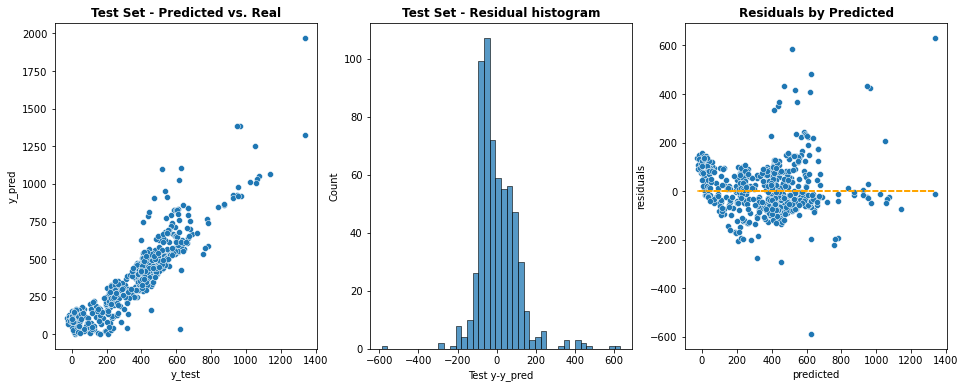

In [29]:
fig1, ax1 = plt.subplots(1,3, figsize=(16,6))

sns.scatterplot(x=Y_pred, y=Y_test, ax=ax1[0])
ax1[0].set_xlabel("y_test")
ax1[0].set_ylabel("y_pred")
ax1[0].set_title('Test Set - Predicted vs. Real', fontweight='bold')

sns.histplot(Y_test-Y_pred, ax = ax1[1])
ax1[1].set_xlabel("Test y-y_pred")
ax1[1].set_title('Test Set - Residual histogram', fontweight='bold')

sns.scatterplot(x = Y_pred,y = Y_test - Y_pred, ax=ax1[2])
ax1[2].set_xlabel("predicted")
ax1[2].set_ylabel("residuals")
ax1[2].set_title('Residuals by Predicted', fontweight='bold')
ax1[2].plot(Y_pred,np.zeros(len(Y_pred)),linestyle='dashed', color='orange')

## Power transformer and Quantile Transformer

In [30]:
#qt = QuantileTransformer(output_distribution="normal")
#Customer_Lifetime_Value_transformed = qt.fit_transform(X_num["Customer Lifetime Value"].to_numpy().reshape(-1,1))
#sns.displot(Customer_Lifetime_Value_transformed)
#replace

## pt = PowerTransformer(method = "box-cox", , standardize=False)
 ##Customer_Lifetime_Value_transformed=pt.fit_transform(X_num["Customer Lifetime Value"].to_numpy().reshape(-1,1))
 ##sns.displot(Customer_Lifetime_Value_transformed)
#replace
#X_num["Customer_Lifetime_Value_transformed"]= Customer_Lifetime_Value_transformed
#X_num.drop(["Customer Lifetime Value"],axis=1,inplace=True)

#qt = QuantileTransformer(output_distribution="normal")
#Income_Transformed = qt.fit_transform(X_num["Income"].to_numpy().reshape(-1,1))
#sns.displot(Income_Transformed)
#replace
#X_num["Income_Transformed"]= Income_Transformed
#X_num.drop(["Income"],axis=1,inplace=True)

#qt = QuantileTransformer(output_distribution="normal")
#Monthly_Premium_Auto_transformed = qt.fit_transform(X_num["Monthly Premium Auto"].to_numpy().reshape(-1,1))
#sns.displot(Monthly_Premium_Auto_transformed)
#replace
#X_num["Monthly_Premium_Auto_transformed"]= Monthly_Premium_Auto_transformed
#X_num.drop(["Monthly Premium Auto"],axis=1,inplace=True)

#qt = QuantileTransformer(output_distribution="normal")
#Months_Since_Last_Claim_transformed = qt.fit_transform(X["Months Since Last Claim"].to_numpy().reshape(-1,1))
#sns.displot(Months_Since_Last_Claim_transformed)
#replace
#X_num["Months_Since_Last_Claim_transformed"]= Months_Since_Last_Claim_transformed
#X_num.drop(["Months Since Last Claim"],axis=1,inplace=True)

#qt = QuantileTransformer(output_distribution="normal")
#Months_Since_Policy_Inception_transformed = qt.fit_transform(X_num["Months Since Policy Inception"].to_numpy().reshape(-1,1))
#sns.displot(Months_Since_Policy_Inception_transformed)
#replace
#X_num["Months_Since_Policy_Inception_transformed"]= Months_Since_Policy_Inception_transformed
#X_num.drop(["Months Since Policy Inception"],axis=1,inplace=True)

In [31]:
models = {
    'Linear regression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0),
    'KNN-Regression': KNeighborsRegressor(n_neighbors=5)
}

def R2_adjusted(mod):
    r2_adjusted = dict()
    for model_name, model_score in mod.items():
        model_score = 1 - (1-R2_score[model_name])*(len(Y_test)-1)/(len(Y_test)-X_test_scaled.shape[1]-1)
        
    return r2_adjusted


In [32]:
def apply_model(models):
    
    r2_scores = dict()
    r2_adjusted = dict()
    
    for model_name, model in models.items():
        model.fit(X_train_scaled, Y_train)
        Y_pred = model.predict(X_test_scaled)
        r2_scores[model_name] = r2_score(Y_test, Y_pred)
        r2_adjusted[model_name] = 1 - (1-r2_scores[model_name])*(len(Y_test)-1)/(len(Y_test)-X_test_scaled.shape[1]-1)
    return r2_adjusted

In [33]:
apply_model(models)

{'Linear regression': 0.7913503939543859,
 'Lasso': 0.7914734828900649,
 'Ridge': 0.7913702410927013,
 'KNN-Regression': 0.5100355499037115}

In [34]:
X_added_constant = sm.add_constant(X)
X_added_constant

,const,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,State_California,State_Nevada,State_Oregon,...,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Size_Medsize,Vehicle Size_Small
0,1.0,14947.92,22139.0,100,34.0,31,2,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,1.0,5154.76,82730.0,127,13.0,31,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1.0,5454.59,66334.0,69,25.0,25,4,1,0,0,...,1,0,1,0,0,0,0,0,1,0
3,1.0,5326.68,76717.0,66,26.0,10,6,1,0,0,...,1,0,1,0,0,0,0,0,0,0
4,1.0,2736.35,17533.0,73,10.0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,1.0,9075.77,37722.0,116,8.0,23,8,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3069,1.0,3579.02,28304.0,91,10.0,30,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3070,1.0,2771.66,59855.0,74,30.0,82,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3071,1.0,5259.44,61146.0,65,7.0,68,6,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [35]:
model = sm.OLS(Y,X_added_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total Claim Amount   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     279.4
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:43:29   Log-Likelihood:                -18783.
No. Observations:                3073   AIC:                         3.765e+04
Df Residuals:                    3029   BIC:                         3.792e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -283.0878     21.594    -13.110      0.000    -325.428    -240.748
Customer Lifetime Value            0.0014      0.001      1.867      0.062   -6.87e-05       0.003
Income                            -0.0003      0.000     -3.127      0.002      -0.001      -0.000
Monthly Premium Auto               4.3837      0.181     24.230      0.000       4.029       4.738
Months Since Last Claim            0.0661      0.198      0.333      0.739      -0.323       0.455
Months Since Policy Inception     -0.0780      0.072     -1.084      0.278      -0.219       0.063
Number of Policies                 0.6240      0.856      0.729      0.466      -1.055       2.303
State_California                  -2.2470      5.704     -0.394      0.694     -13.432       8.938
State_Nevada                      -9.6766      7.825     -1.237      0.216     -25.019       5.665
State_Oregon                      -6.3957      5.871     -1.089      0.276     -17.907       5.115
State_Washington                  -1.8962      8.030     -0.236      0.813     -17.642      13.850
Response_Yes                      -8.0578      6.111     -1.318      0.187     -20.041       3.925
Coverage_Premium                  -2.8512     10.484     -0.272      0.786     -23.408      17.705
Education_College                 -5.4804      5.184     -1.057      0.291     -15.645       4.684
Education_Doctor                  -3.2878     10.345     -0.318      0.751     -23.572      16.996
Education_High School or Below    -1.4145      5.385     -0.263      0.793     -11.973       9.144
Education_Master                 -10.7771      7.534     -1.430      0.153     -25.549       3.995
EmploymentStatus_Employed         -0.0145      9.321     -0.002      0.999     -18.290      18.261
EmploymentStatus_Medical Leave    21.8221     11.541      1.891      0.059      -0.808      44.452
EmploymentStatus_Retired         -13.8824     13.417     -1.035      0.301     -40.189      12.425
Gender_M                           7.7311      4.035      1.916      0.055      -0.181      15.644
Location Code_Suburban           370.4080      5.381     68.837      0.000     359.857     380.959
Location Code_Urban              213.2568      5.802     36.756      0.000     201.881     224.633
Marital Status_Married           -10.6836      4.368     -2.446      0.015     -19.248      -2.120
Policy Type_Personal Auto         17.3328      7.756      2.235      0.026       2.124      32.541
Policy Type_Special Auto          14.3742     10.686      1.345      0.179      -6.578      35.326
Policy_Corporate L2               -0.7974     12.950     -0.062      0.951     -26.188      24.593
Policy_Corporate L3               15.9449     11.693      1.364      0.173      -6.981      38.871
Policy_Persona

In [36]:
X_added_constant = X_added_constant.drop(["State_California", "State_Nevada", "State_Oregon", "State_Washington", "Response_Yes", "Months Since Policy Inception", "Months Since Last Claim", "Coverage_Premium", "Number of Policies", "Gender_M", "Policy Type_Personal Auto", "Education_College", "Education_Master", "Education_Doctor", "Education_High School or Below", "EmploymentStatus_Employed", "EmploymentStatus_Retired", "Policy Type_Special Auto", "Policy_Corporate L2", "Policy_Corporate L3", "Policy_Personal L2", "Policy_Personal L3", "Policy_Special L3", "Policy_Special L2", "Policy_Special L1", "Renew Offer Type_Offer3", "Sales Channel_Branch", "Sales Channel_Call Center", "Vehicle Class_Luxury Car", "Vehicle Class_Luxury SUV", "Sales Channel_Web", "Vehicle Size_Medsize", "Vehicle Size_Small"], axis=1)



In [37]:
model = sm.OLS(Y,X_added_constant).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total Claim Amount   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     998.5
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:43:30   Log-Likelihood:                -18799.
No. Observations:                3073   AIC:                         3.762e+04
Df Residuals:                    3060   BIC:                         3.770e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -271.6163      9.588    -28.328      0.000    -290.416    -252.816
Customer Lifetime Value            0.0016      0.001      2.268      0.023       0.000       0.003
Income                            -0.0003   9.25e-05     -2.859      0.004      -0.000   -8.31e-05
Monthly Premium Auto               4.4255      0.077     57.591      0.000       4.275       4.576
EmploymentStatus_Medical Leave    24.1879      8.765      2.760      0.006       7.002      41.374
Location Code_Suburban           371.4152      5.098     72.849      0.000     361.419     381.412
Location Code_Urban              213.5327      5.777     36.964      0.000     202.206     224.860
Marital Status_Married            -9.0314      4.291     -2.104      0.035     -17.446      -0.617
Policy_Personal L1                15.8756      5.817      2.729      0.006       4.470      27.281
Renew Offer Type_Offer2           12.0164      4.466      2.690      0.007       3.259      20.774
Renew Offer Type_Offer4           13.2109      6.235      2.119      0.034       0.986      25.436
Vehicle Class_SUV                -20.0033      5.769     -3.467      0.001     -31.315      -8.691
Vehicle Class_Sports Car         -45.6628      9.887     -4.618      0.000     -65.049     -26.277
==============================================================================
Omnibus:                     1990.185   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90107.755
Skew:                           2.461   Prob(JB):                         0.00
Kurtosis:                      29.068   Cond. No.                     3.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Recursive feature elimination

In [38]:
lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 12, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, Y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train1 = selector.transform(X_train)
X_test1  = selector.transform(X_test)

X_train1 = pd.DataFrame(X_train1, columns=kept_features)
X_test1  = pd.DataFrame(X_test1, columns=kept_features)

print("Final selected features: ")
display(X_train1)

Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 fe

,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Policy Type_Special Auto,Policy_Personal L1,Policy_Special L3,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2453,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2454,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2456,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
lm.fit(X_train, Y_train)
R2=lm.score(X_train,Y_train)




In [40]:
R2

0.7963069513088672

## Variance threshold method


In [41]:
from sklearn.feature_selection import VarianceThreshold # It only works with numerical features


X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

#display(X_train)
print("Initial number of numerical columns: ",X_train.shape)
print()


selector = VarianceThreshold(threshold=1) # Default threshold value is 0
# Features with a training-set variance lower than this threshold will be removed.
selector.fit(X_train)

kept_features_indexes = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features_indexes].columns)

X_train2 = selector.transform(X_train)
X_test2  = selector.transform(X_test)

X_train2 = pd.DataFrame(X_train2, columns=kept_features)
X_test2  = pd.DataFrame(X_test2, columns=kept_features)

print("Final number of numerical columns: ",X_train2.shape)
print()
X_train2

Initial number of numerical columns:  (2458, 45)

Final number of numerical columns:  (2458, 45)



,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies
0,5823.16,88359.0,73.0,1.0,49.0,9.0
1,7668.81,92456.0,95.0,8.0,3.0,4.0
2,2855.69,99612.0,70.0,14.0,20.0,1.0
3,4558.43,14665.0,61.0,6.0,82.0,3.0
4,4334.06,23904.0,123.0,1.0,67.0,1.0
...,...,...,...,...,...,...
2453,4773.66,27725.0,63.0,1.0,93.0,4.0
2454,5757.49,81491.0,72.0,21.0,24.0,3.0
2455,5382.75,77552.0,68.0,33.0,76.0,7.0
2456,7540.91,61726.0,96.0,33.0,30.0,4.0
